### Capstone GDP & Suicide: A Global Correlation

Beginning to import code & conduct preliminary analysis

In [46]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# load data from excel
#df = pd.read_excel('C:/Users/jlevi/code/savvycoders/Capstone/suicide_capstone/FinalDatasets/TransposedDataSet.xlsx')

# preliminary data check
#print(df.head())
#print(df.info())
#print(df.describe())

# Finish Cleaning Data:
# remove country Turkey b/c missing a lot of values 
#df = df[df['Country'] != 'Turkiye']

# change column name for suicide rates
#df = df.rename(columns={'Suicide_Rate': 'SuicideRate'})

# filter to years 1995-2017
#df = df[(df['Year'] >= 1995) & (df['Year'] <= 2017)]

# check
#print(df['Country'].value_counts())



In [47]:
# check null values
#print(df.isnull())
#sr_null_count = df['SuicideRate'].isnull().sum()
#gdp_null_count = df['GDP_USD'].isnull().sum()
#print(f"# of null values in SuicideRate column: {sr_null_count}")
#print(f"# of null values in GDP column: {gdp_null_count}")

# export to excel to look at null
#df.to_excel('cleaned_dataset.xlsx', index=False)

# import cleaned dataset
df1 = pd.read_excel('C:/Users/jlevi/code/savvycoders/Capstone/suicide_capstone/FinalDatasets/final_cleaned_dataset.xlsx')
print(df1.columns)


Index(['Country', 'Year', 'SuicideRate', 'GDP_USD', 'GDPGrowthAnnualPercent',
       'RegionMetDataGDP', 'IncomeGroupFromGDP', 'SpecialNotesFromGDP'],
      dtype='object')


### Preliminary Analysis

**Steps:**
1. Calculate descriptive statistics for my var. of interest to gain understanding of distribution & variation of data
2. Create scatter plots to visualize relationship between GDP & suicide rates for each country & year. **Check for outliers** or patterns
3. Compute correlation coefficients to measure strength & direction of the linear relationship between GDP & suicide rates for each country & year. **Check for significant correlations**
4. Run regression models to examine relationship
* Unable to control for other variables such as population, income, inequality, & mental health expenditure, that may affect the relationship due to time/data constraints 
* Panel data - effect of GDP on suicide rate within each country & want to control for country specific factors that are constant over time (cultural stigma w mental health, cultural attitude to drinking, etc)
* Time series data - overall effect of GDP on suicide rate across all countries over time
5. Perform hypothesis tests to determine if relationship is statistically significant 

In [49]:
# descriptive statistics
# mean/median
gdp_mean = np.mean(df1['GDP_USD'])
suicide_rate_mean = np.mean(df1['SuicideRate'])

gdp_median = np.median(df1['GDP_USD'])
suicide_rate_median = np.median(df1['SuicideRate'])

# st dev / variance
gdp_stdev = np.std(df1['GDP_USD'])
suicide_rate_stdev = np.std(df['SuicideRate'])

gdp_var = np.var(df1['GDP_USD'])
suicide_rate_var = np.var(df1['SuicideRate'])

# min/max
gdp_min = np.min(df1['GDP_USD'])
suicide_rate_min = np.min(df1['SuicideRate'])

gdp_max = np.max(df1['GDP_USD'])
suicide_rate_max = np.max(df1['SuicideRate'])

# skewness/kurtosis/correlation matrix
gdp_skew = df1['GDP_USD'].skew()
suicide_rate_skew = df1['SuicideRate'].skew()

gdp_kurt = df1['GDP_USD'].kurtosis()
suicide_rate_kurt = df1['SuicideRate'].kurtosis()

#gdp_corr = df[['GDP_USD']].corr()
#suicide_rate_corr = df[['SuicideRate']].corr()

# print descriptive statistics
print('Descriptive Statistics:\n') #print descriptive statistics string
print('GDP_USD Mean: ', round(gdp_mean))
print('SuicideRate Mean: ', round(suicide_rate_mean,3))
print('GDP_USD Median: ', gdp_median)
print('SuicideRate Median: ', suicide_rate_median)
print('GDP_USD Standard Deviation: ', round(gdp_stdev, 3))
print('SuicideRate Standard Deviation: ', round(suicide_rate_stdev,3))
print('GDP_USD Variance: ', round(gdp_var,3))
print('SuicideRate Variance: ', round(suicide_rate_var,3))
print('GDP_USD Min: ', round(gdp_min))
print('SuicideRate Min: ', suicide_rate_min)
print('GDP_USD Max: ', gdp_max)
print('SuicideRate Max: ', suicide_rate_max)
print('GDP_USD Skewness: ', round(gdp_skew,3))
print('SuicideRate Skewness: ', round(suicide_rate_skew,3))
print('GDP_USD Kurtosis: ', round(gdp_kurt,3))
print('SuicideRate Kurtosis: ', round(suicide_rate_kurt,3))





Descriptive Statistics:

GDP_USD Mean:  929992797455
SuicideRate Mean:  14.839
GDP_USD Median:  258000000000.0
SuicideRate Median:  12.5
GDP_USD Standard Deviation:  2195774979277.486
SuicideRate Standard Deviation:  11.006
GDP_USD Variance:  4.821427759621045e+24
SuicideRate Variance:  120.973
GDP_USD Min:  4502970889
SuicideRate Min:  0.4
GDP_USD Max:  19500000000000
SuicideRate Max:  214.0
GDP_USD Skewness:  5.261
SuicideRate Skewness:  6.526
GDP_USD Kurtosis:  32.198
Suiciderate Kurtosis:  105.862


### Preliminary analysis from descriptive statistics

Both GDP and suicide rate have a wide range of values. GDP ranges from 4.5 billion USD to 19.5 trillion USD. Suicide rate ranges from 0.4 to 214. Looking at the means of the two, suggests that GDP is generally much higher than suicide rate across the sample

Both variables have a positive skewness, w suicide rate having slightly higher. Suggesting more extreme values on the right-hand side of the distribution for both. Kurtosis are also quite high for both, indicating both distributions have more extreme values than a normal distribution. 

Overall this suggests there may be challenges when modeling this relationship due to extreme values in data
* use robust statistical methods

Text(0.5, 1.0, 'Relationship between GDP & Suicide Rate')

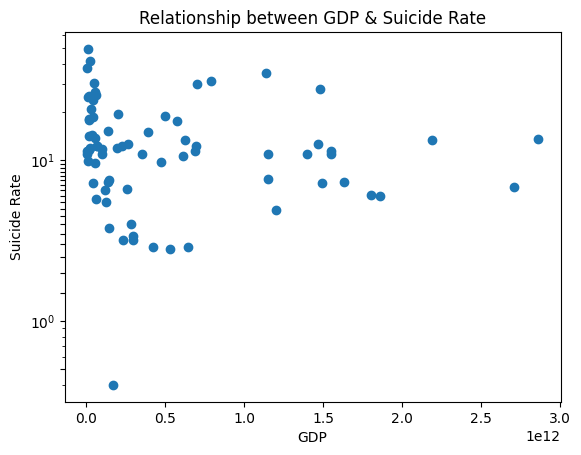

In [66]:
# filter outliers out
#q = df['SuicideRate'].quantile(0.95)
# df1 = df1[df1['SuicideRate'] <= q]

# set log scale on y-axis
#plt.yscale('log')

# plot random sample 
#sample = df.sample(75)
#plt.scatter(sample['GDP_USD'], sample['SuicideRate'])

# set axis labels & titles
#plt.yticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
#plt.xlabel('GDP')
#plt.ylabel('Suicide Rate')
#plt.title('Relationship between GDP & Suicide Rate')

# visualizations
#plt.scatter(df1['GDP_USD'], df1['SuicideRate'])
#plt.title('GDP vs. Suicide Rate')
#plt.xlabel('GDP (USD)')
#plt.ylabel('Suicide Rate (per 100k)')
#plt.show()

### Later part 

In [69]:
# run OLS regression
# Define variables
y = df1['SuicideRate'] # Independent var
X = df1['GDP_USD'] # Dependent var

X = sm.add_constant(X) # Add a constant to the independent var. 

# create & fit a linear regression model 
model = sm.OLS(y, X) 
results = model.fit()

# print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            SuicideRate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6350
Date:                Mon, 03 Apr 2023   Prob (F-statistic):              0.426
Time:                        21:39:57   Log-Likelihood:                -3245.4
No. Observations:                 961   AIC:                             6495.
Df Residuals:                     959   BIC:                             6505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4142      0.249     53.801      0.0

### Results from regression

Indicates a weak relationship between GDP & Suicide Rate. R squared indicates only 0.1% of the variance in suicide rate is explained by GDP. The p value shows that it is not statistically significant. No linear relationship. Suggestion possible multicollinearity or numerical issues


In [70]:
# try panel data
# set index to panel data

panel_data = panel_data.set_index(['panel_index'])

#create time var
panel_data['time'] = panel_data.index.str.split('-', expand = True)[1].astype(int)

panel_data = panel_data.set_index(['panel_index', 'time'])

y = panel_data['suicide_rate']
X = panel_data[['GDP_USD',]]

X= sm.add_constant(X)

model = sm.PanelOLS(y, X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='clusterd', cluster_entity=True)

print(results.summary())

NameError: name 'panel_data' is not defined

In [ ]:
# run linear regression model
X = df1[['GDP_USD']] # independent variable
y = df1['Suicide_Rate'] # dependent variable
model = LinearRegression().fir(X,y)

# print the model coefficients
#print(model.intercept_)
#print(model.coef_)



In [ ]:
# use statsmodels to run regression & print summary
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())